In [1]:
# from pandas import read_csv
import pandas as pd
filename = '../Week 1/pima-indians-diabetes.data.csv'
names = ['timesPreg', 'plasmaConcenTest', 'bloodPres', 'skinFoldThickness',
         '2HSerumInsulin', 'BMI', 'diabetesPedigree', 'age', 'onsetOfDiabetesbtw5yrs']
# data = read_csv(filename, names=names)
df = pd.read_csv(filename, names=names)
df.head(2)

,timesPreg,plasmaConcenTest,bloodPres,skinFoldThickness,2HSerumInsulin,BMI,diabetesPedigree,age,onsetOfDiabetesbtw5yrs
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [11]:
# Import libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Select variables and predictor
array = df.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Perform classification and select accuracy
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 77.086% (5.091%)


In [31]:
# Classification metric - Logloss

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

yk_grds_prob = model.predict_proba(X_test)

result = log_loss(Y_test, yk_grds_prob)
print("Logloss: %.3f" % (result))
print(yk_grds_prob[:2,0:2])

Logloss: 0.504
[[0.8701945  0.1298055 ]
 [0.21531887 0.78468113]]


AUC: 0.824


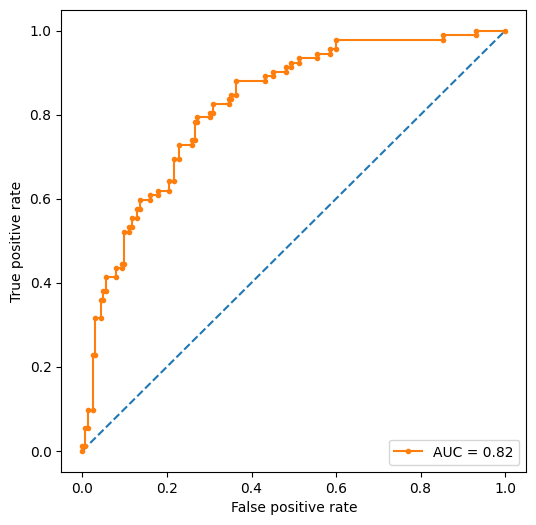

In [52]:
# Classification metric area under AOC

from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print("AUC: %.3f" % auc)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.figure(figsize=(6, 6))
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.', label=f'AUC = {auc:.2f}')
pyplot.xlabel('False positive rate')
pyplot.ylabel('True positive rate')
pyplot.legend(loc='lower right')
pyplot.show()